In [44]:
# Plot Surrogate Predictions
from gp_predict import *
import pandas as pd
import numpy as np
from diff_evolution_col import *

In [45]:
ii = 0

# Here, call surrogate model
surrogate_dir = r'C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\combined_pd_005_just_good_data'
template_dir = os.path.join(surrogate_dir, 'templatedir_SIM')

surrogate_file = surrogate_dir + r'\SimGpModel.json'
# json_dir = template_dir + r'\scInput.json'
# result_file = template_dir + r'\ops.out'
input_json = r'C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json'


In [46]:
# load the merged_data.csv file
merged_data = pd.read_csv(surrogate_dir + r'\train_data.csv')

cal_params_index = np.arange(0, 14)
nd_params_index = np.arange(17, 23)

# Extract the calibrated and nondimensional parameters for both training and testing
cal_params_all = merged_data.iloc[:, cal_params_index]
nondim_params_all = merged_data.iloc[:, nd_params_index]


merged_data

eta1   kappa_k     kappa       sig       lam       mup      sigp  \
0   0.793067  0.622089  1.035890  0.201992  0.198395  2.371015  1.811930   
1   1.345305  1.167902  1.032582  0.149860  0.165662  3.554978  3.597197   
2   0.772747  0.630167  1.001471  0.077689  0.146220  3.703910  0.803579   
3   1.003544  0.574342  0.974244  0.401307  0.150498  1.291786  1.320936   
4   0.722820  0.560514  1.002256  0.185571  0.062668  1.758017  2.005158   
5   1.219652  0.500000  1.050000  0.172386  0.128683  2.506570  4.941139   
6   1.528132  1.397212  0.990616  0.368537  0.443087  2.197786  2.094278   
7   1.184817  0.908320  0.959475  0.396224  0.256509  0.531340  0.317291   
8   1.386556  1.377865  1.047399  0.342784  0.287537  3.432922  1.239678   
9   0.722004  0.500000  1.050000  0.179699  0.074498  0.586256  4.037439   
10  1.437762  0.768896  1.043769  0.058180  0.098129  3.829599  3.489129   
11  1.518193  1.494180  1.031241  0.276459  0.204299  3.990342  1.960309   
12  1.792578  1.097791  0.992543  0.252776  0.194457  1.595152  2.058266   
13  0.801189  1.986198  1.000156  0.275466  0.329429  2.668027  1.747025   
14  1.404375  0.534702  1.028113  0.337604  0.167089  1.295084  0.740858   
15  0.921636  3.029044  1.000427  0.213032  0.227089  2.240868  2.049251   
16  1.591044  1.120321  1.009733  0.301179  0.085914  2.732280  3.611899   
17  2.000000  2.606157  1.030410  0.299087  0.228638  3.980547  1.313950   
18  0.721358  1.174308  1.036948  0.177662  0.188364  4.637513  2.935499   
19  1.836746  0.695673  0.999587  0.307196  0.404288  0.515607  0.140516   
20  1.435057  1.603626  0.977672  0.360272  0.211456  2.613864  0.125691   
21  1.022081  0.629409  0.980421  0.667802  0.288124  0.233077  1.833213   
22  0.917764  0.667614  0.994551  0.193446  0.158962  1.010302  4.900075   
23  1.261570  0.957591  0.987673  0.378362  0.029178  1.068597  1.912581   
24  1.166993  0.875798  1.038903  0.083347  0.108384  1.660801  2.590582   
25  2.000000  0.500000  1.050000  0.234547  0.245237  5.000000  0.344530   
26  1.281229  2.280211  0.956893  0.133762  0.140104  0.379928  4.316730   
27  1.267335  2.678181  1.044735  0.389762  0.325598  0.386566  0.517464   

       rsmax         n     alpha  ...     gamma  \
0   0.697550  1.817540  0.012094  ...  0.179954   
1   0.978844  2.554040  0.008655  ...  0.659643   
2   0.714506  1.726458  0.013346  ...  0.169726   
3   0.953338  8.329699  0.003101  ...  0.743085   
4   0.721269  3.982868  0.003115  ...  0.547248   
5   0.886171  5.594427  0.000000  ...  0.809944   
6   0.936373  3.729441  0.001274  ...  0.300894   
7   0.830325  1.341692  0.022070  ...  0.278082   
8   0.844702  6.351339  0.004548  ...  0.210364   
9   1.000000  2.236048  0.000000  ...  0.482514   
10  0.565924  9.011624  0.001956  ...  1.031799   
11  0.693812  4.827020  0.003021  ...  0.258115   
12  0.947522  6.405990  0.000540  ...  0.257383   
13  0.714904  1.013788  0.002320  ...  0.190341   
14  0.757130  2.437903  0.009449  ...  1.708476   
15  0.919333  2.487308  0.004322  ...  0.319016   
16  0.973609  2.941208  0.000402  ...  0.737528   
17  0.752336  1.467959  0.000000  ...  0.251775   
18  0.867027  1.369161  0.000000  ...  0.233694   
19  0.961662  4.498823  0.021006  ...  0.209043   
20  0.613967  7.027651  0.000287  ...  0.254501   
21  0.619471  2.697441  0.002541  ...  0.235778   
22  0.742501  4.956194  0.009244  ...  0.976594   
23  0.883802  1.465821  0.000559  ...  0.565202   
24  0.934827  3.489658  0.000932  ...  0.176098   
25  0.837410  2.285799  0.000000  ...  0.163602   
26  0.961880  4.988814  0.001267  ...  0.223675   
27  0.993302  6.535933  0.002377  ...  0.206365   

                               name  PeakDrift    FailureType        ar  \
0            Ang et al. 1985, No. 5   0.039071  Flexure-Shear  0.500000   
1       Arakawa et al. 1988, No. 27   0.031256          Shear  0.458333   
2            Ang et al. 1985, No. 6   0.025655          Shear  0.500000   
3       Arakawa et al. 

Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[0.81175621716463, 0.6221476022849419, 1.0315813114173733, 0.16910121485534663, 0.19839074564889525, 2.459700184228211, 1.8115942447125868, 0.6975537481662855, 1.817544240238563, 0.010031742106080058, 3.6578852925449055, 1.5314165399560917, 0.019477169113420956, 0.17994209503185682]


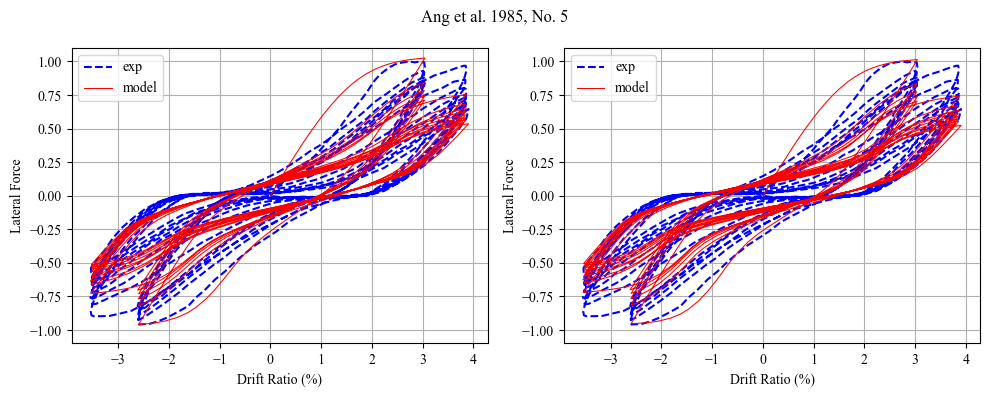



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[0.7731996129829206, 0.6303611505885124, 0.998206890918925, 0.15394686532398527, 0.14621838444338048, 3.4638355598837482, 0.8032616173918374, 0.7145188535791028, 1.7265309888837788, 0.012316692436045756, 3.501747350556359, 1.0688263100230335, 0.03550352500208967, 0.1697313276310185]


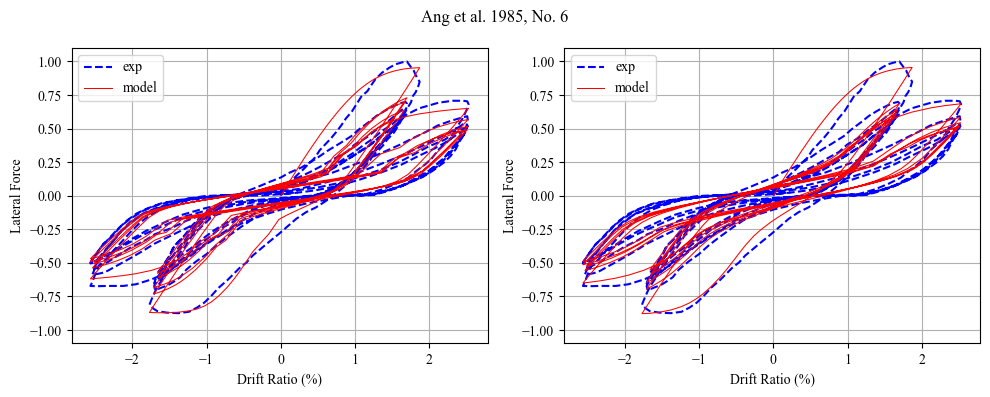



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.5909801128103094, 1.120289318912405, 1.0024605561137503, 0.2318252953061825, 0.08591057903153278, 2.69984144405489, 3.612061927941825, 0.9736145274658956, 2.9413130468653352, 0.0002117320441984245, 1.8449538294514474, 1.3918462873088815, 0.01119635590117542, 0.7375306035969058]


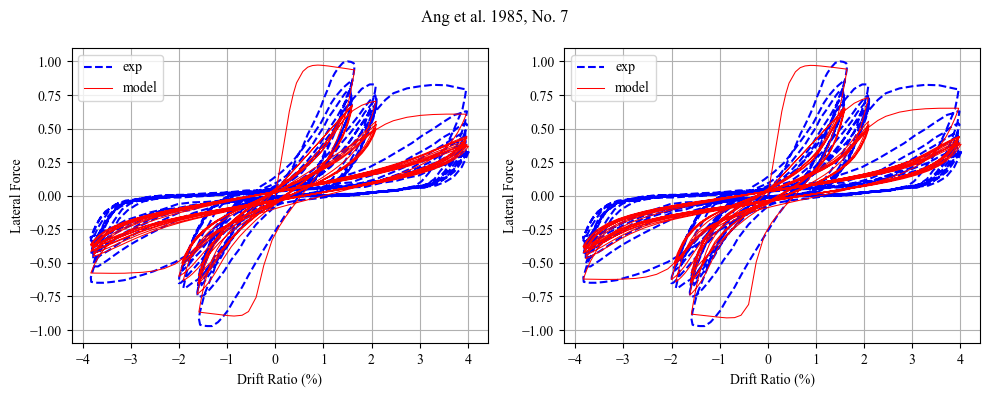



Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.167030537054524, 0.8757553632699862, 1.029989358809544, 0.15308536769101588, 0.10838050606926615, 2.0485774581827023, 2.590677619505816, 0.934829980719829, 3.4892743985176553, 0.0019905541184640487, 9.548710213560149, 0.8373812857427946, 0.011276596005790498, 0.17610003257843437]


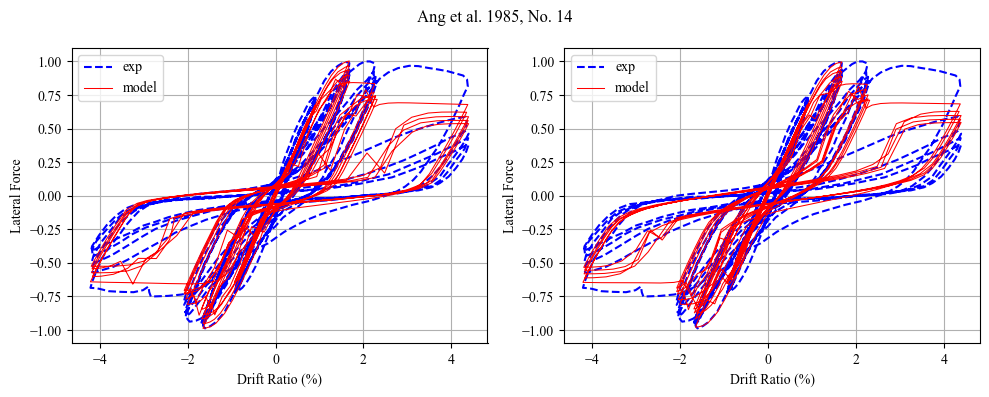



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.2811988561803507, 2.28025372848491, 0.9872478537243432, 0.27247030317718585, 0.14010004852080804, 0.6953945073092638, 4.316807728757418, 0.9618773441850741, 4.988721482436887, 0.0012857067905946268, 3.136272614535719, 0.31043773315121803, 0.010598005062321825, 0.22367439708540546]


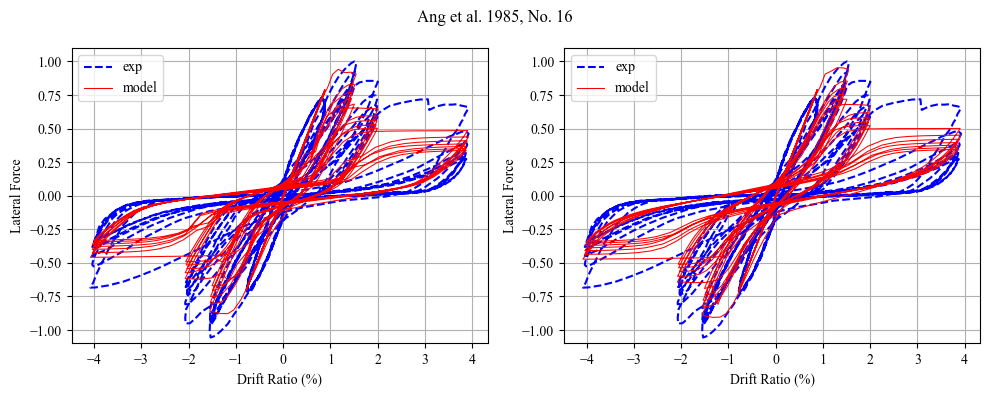



Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[0.7220475070306284, 1.1742880233534412, 1.0227512961716678, 0.23947317567648135, 0.1883601890328383, 4.103061473024668, 2.9354979101271255, 0.8670299596357678, 1.3691402592345705, 0.0033413347466636875, 3.0875803774013306, 1.1987324692024923, 0.043412921034415575, 0.2336472912846446]


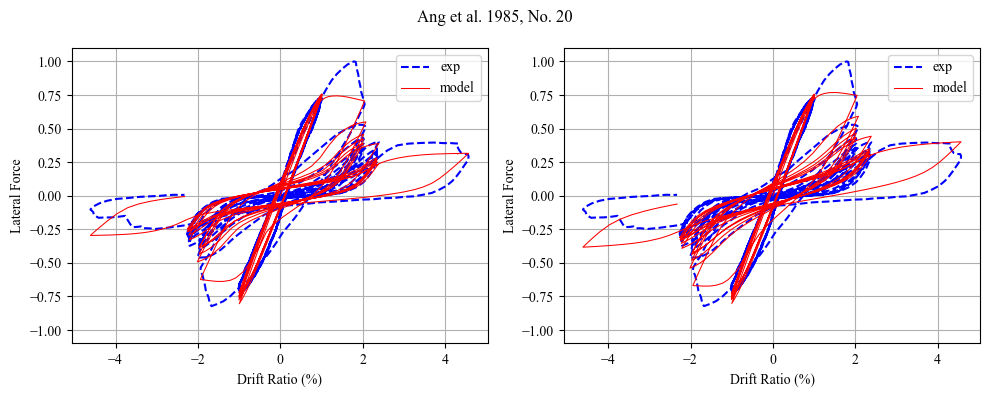



Name not found
Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.9527179207545915, 0.5001213860733791, 1.0090184233229333, 0.16332945724059966, 0.24523878173713382, 4.437381752007169, 0.3444940041557627, 0.8374074068487063, 2.2857970483826717, 0.0008175672000359019, 1.754081855411981, 0.9559424525425833, 0.022403931660684166, 0.1635985451624113]


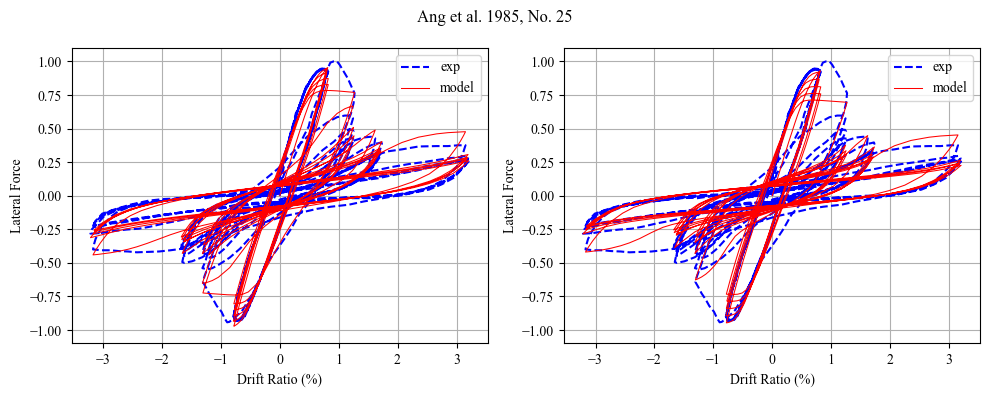



Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.9991214916360902, 2.606170600268975, 1.0282845371000005, 0.31227106534551285, 0.2286397205353023, 3.6573287800670062, 1.3139507365284187, 0.7523400178277003, 1.4679550409735005, 0.0007121292186050678, 3.9267987918265725, 1.2155093421204048, 0.0018266946254484762, 0.25177296963165063]


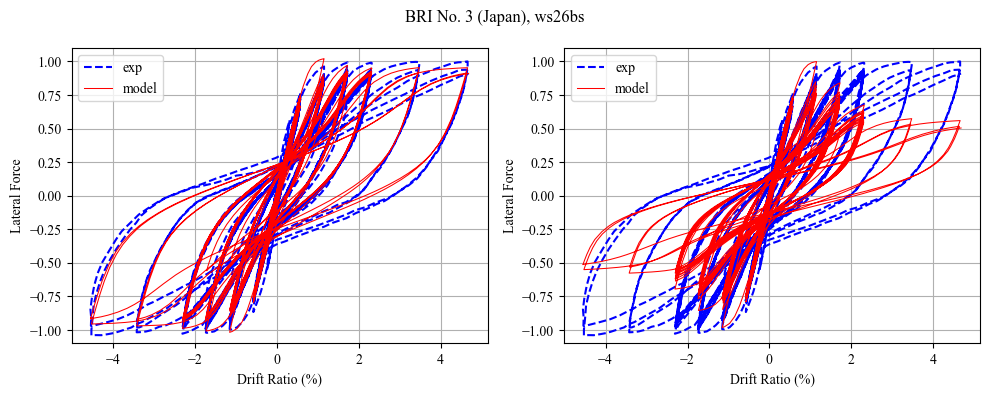



Name not found
Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.2519842857142855, 1.4941797911710437, 1.0124182142857143, 0.33249512812004356, 0.19816071428571427, 2.20617, 2.169233599775266, 0.6938109516556425, 4.8270460565456235, 0.004587142857142857, 4.036674285714286, 0.7437885164226521, 0.01748356152987815, 0.27885279865917234]


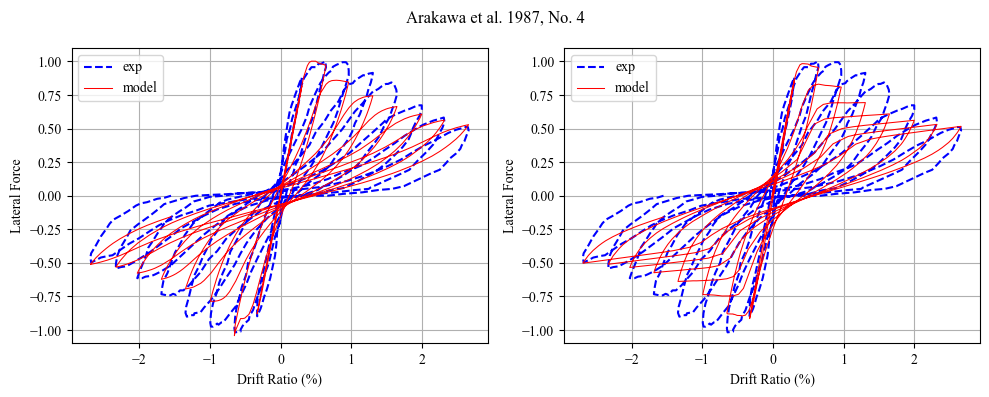



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.2615663130189916, 0.9576932554906759, 0.9908856100440221, 0.33905608933478804, 0.02917791851739096, 1.263722377823369, 1.9125795089099504, 0.88380076742633, 1.4657242778451667, 0.0031049944732761724, 2.759540519939483, 1.189207777135778, 0.010303070591291694, 0.5651883490052185]


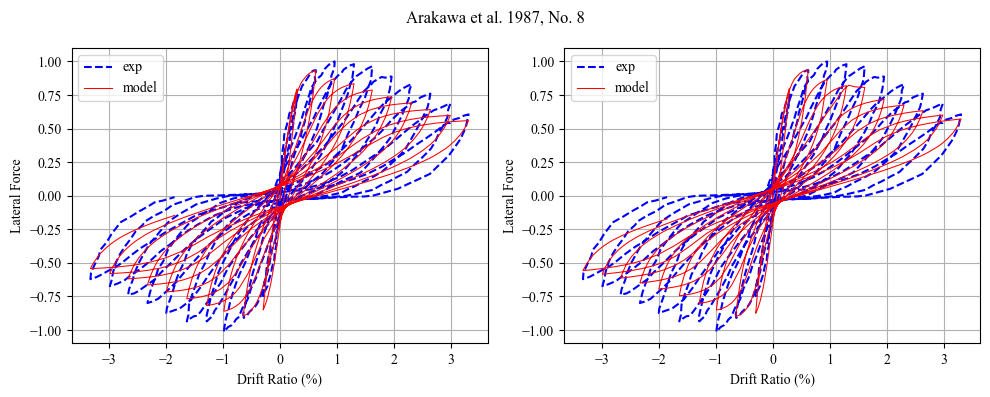



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.3853130743289421, 1.3778384175492928, 1.0198575519002917, 0.36033967057523003, 0.2875402245519947, 3.1998302442755913, 1.2396754434313948, 0.8446999996688673, 6.350603251022308, 0.0020290231061014193, 6.509082898490957, 1.476491790852008, 0.01279976895585938, 0.21036133864374962]


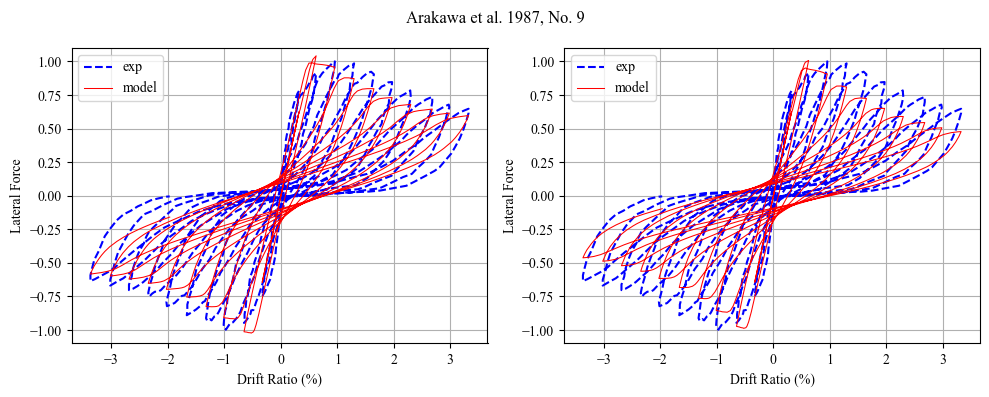



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[0.9181669555917795, 0.6676391969583536, 0.9993138411297894, 0.230481927374762, 0.15896373928620205, 1.232977426701539, 4.900080681111918, 0.7425000228309947, 4.9561904150859, 0.007377811547930723, 1.1872231966104607, 0.3447720958156322, 0.018179496022156592, 0.9766020608059982]


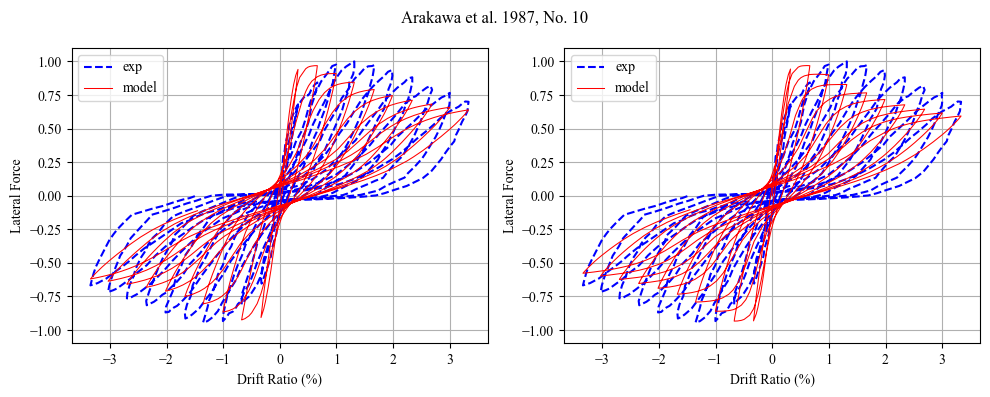



Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.2519842857142855, 1.3972081997473174, 1.0124182142857143, 0.3335505161837319, 0.19816071428571427, 2.20617, 2.1374139662171903, 0.936369221565862, 3.7294651230458062, 0.004587142857142857, 4.036674285714286, 0.7371262028274302, 0.017069356311415936, 0.3165991711279723]


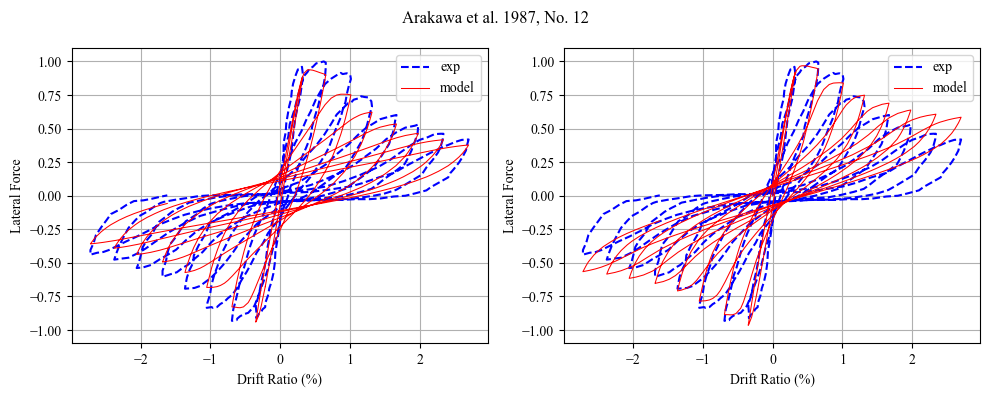



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.0038380448946793, 0.5742119513457095, 0.9887353904156284, 0.3551359852071988, 0.15050371048926903, 1.350182910938129, 1.3207563215302769, 0.953363003056843, 8.329798905191115, 0.0025146703114720397, 6.8582696071437885, 1.266703102098178, 0.018241860493337144, 0.7431006565823626]


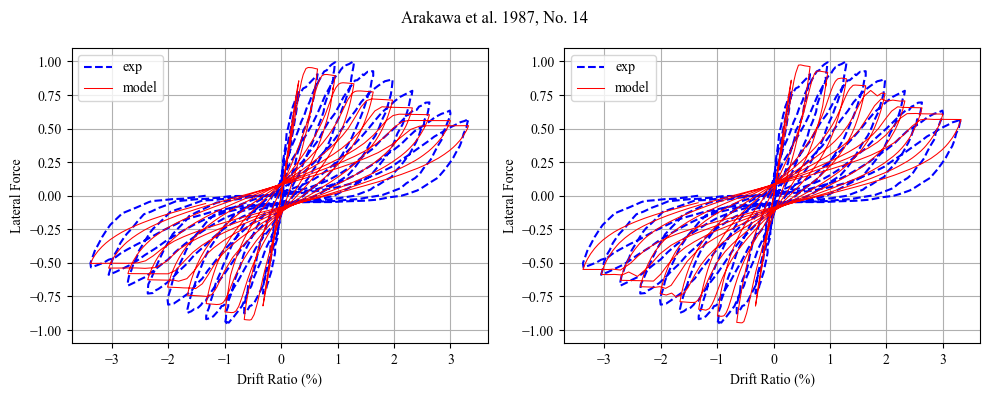



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.4430434764299436, 1.6037610145532701, 1.0198838563714343, 0.35982452003073406, 0.21146055568541675, 2.606027335323506, 0.12560531341300174, 0.6139550406417722, 7.0274379051390525, 0.001992512526827787, 3.3230277036967464, 1.508346180390067, 0.007201037358139568, 0.2545086861008581]


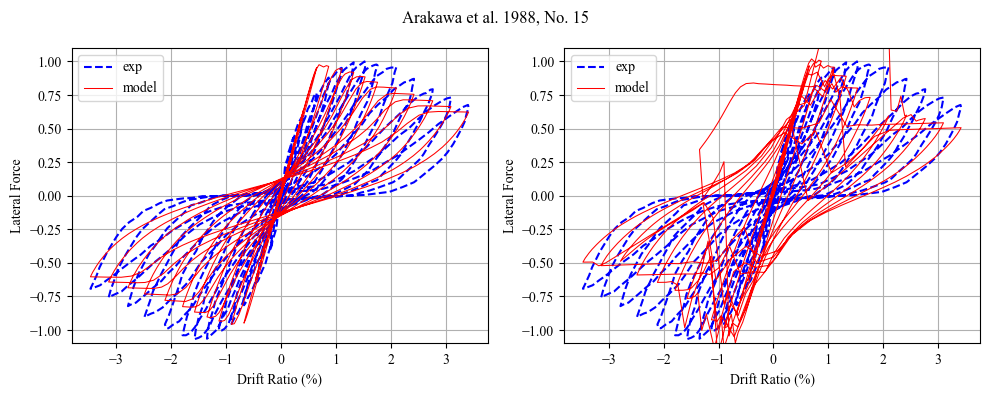



Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[0.726015647056045, 0.5001188982464367, 1.0198157816188562, 0.20713304729748033, 0.0745000027932346, 0.6986166465310548, 4.037251261628756, 1.0000020711233464, 2.235761817451884, 0.00208552289419875, 1.860468823241487, 0.45343018345117736, 0.017082717580595225, 0.4825109318800651]


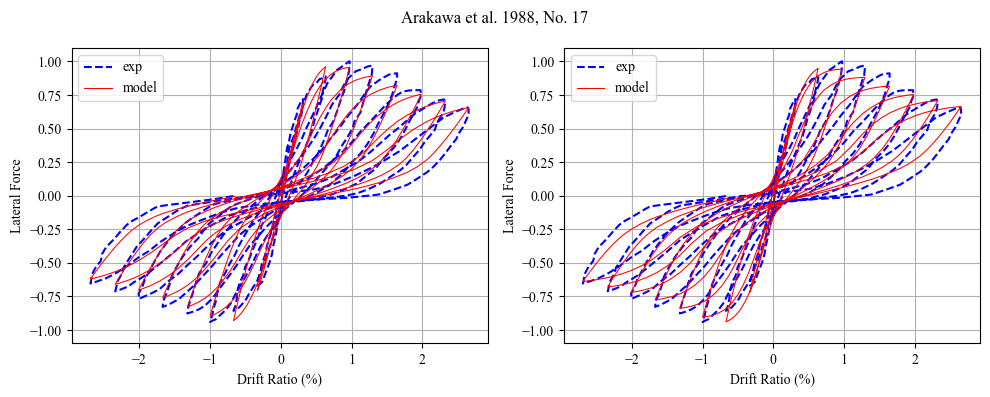



Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.2519842857142855, 0.5606891850851445, 1.0124182142857143, 0.18891066057577027, 0.19816071428571427, 2.20617, 2.0123094448889463, 0.7212709296839803, 3.9825697979190373, 0.004587142857142857, 4.036674285714286, 0.6804431254123148, 0.018548137806506118, 0.5353166865277464]


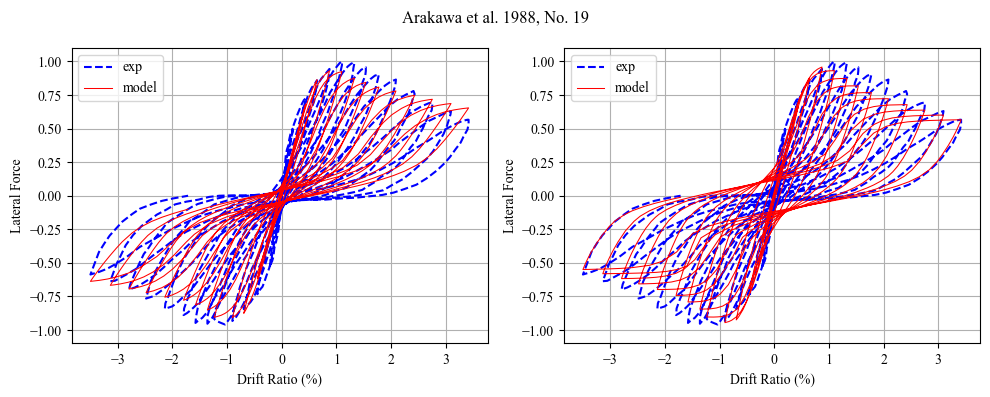



Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[0.9129971387436695, 3.029207525312245, 1.0239710573726453, 0.17766219969602315, 0.2270895276349993, 2.4277726361577994, 2.0492202140995057, 0.9193300294113682, 2.4874270069391207, 0.005148495884292615, 5.840752147639479, 1.4673969144810677, 0.010278279406825531, 0.31901707608051255]


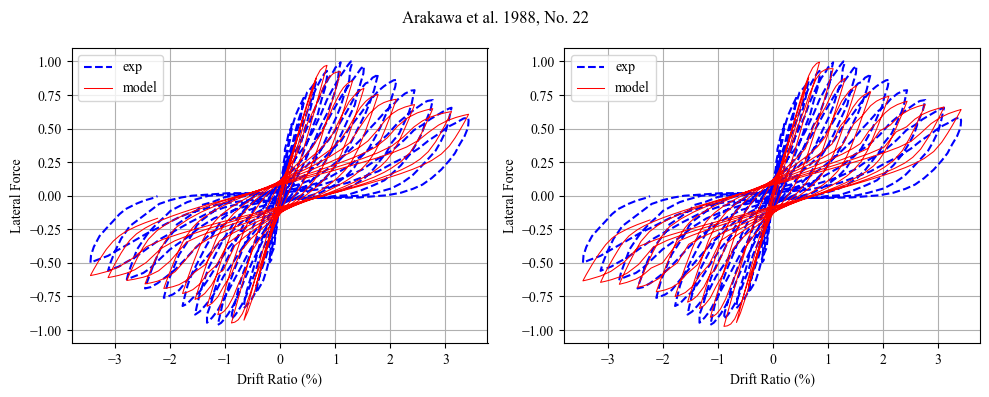



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.219683385508199, 0.5000011040814146, 1.0346675705606565, 0.13898139933970705, 0.12868241510710854, 3.270312632230882, 4.941140402139638, 0.8861698757152999, 5.594423289934851, 0.001865593741403865, 1.0319414200628523, 0.3311979344189726, 0.014253816059882013, 0.8099704738333428]


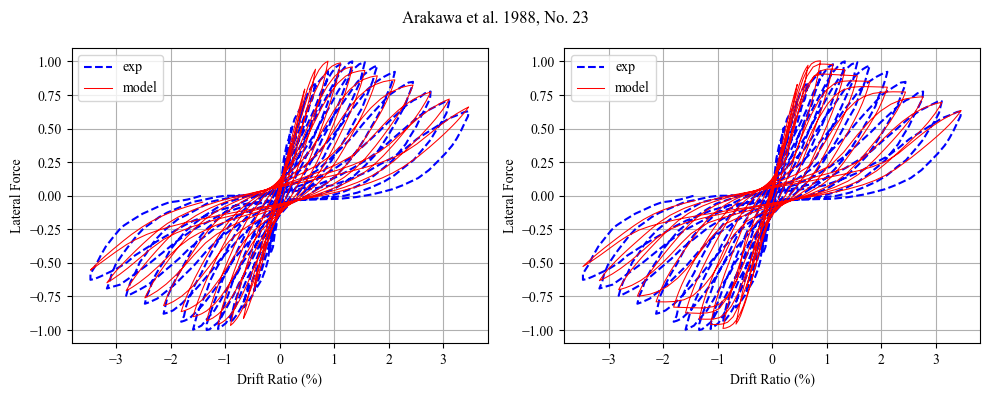



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.7920314856463981, 1.0977900504365927, 1.0147466616566103, 0.22871605868906808, 0.19446066837785872, 1.830393859631452, 2.0583064892457092, 0.9475199002640401, 6.406013544702475, 0.000424796899955413, 3.5968867100783304, 1.3857753524361491, 0.01007635764284703, 0.257364670021096]


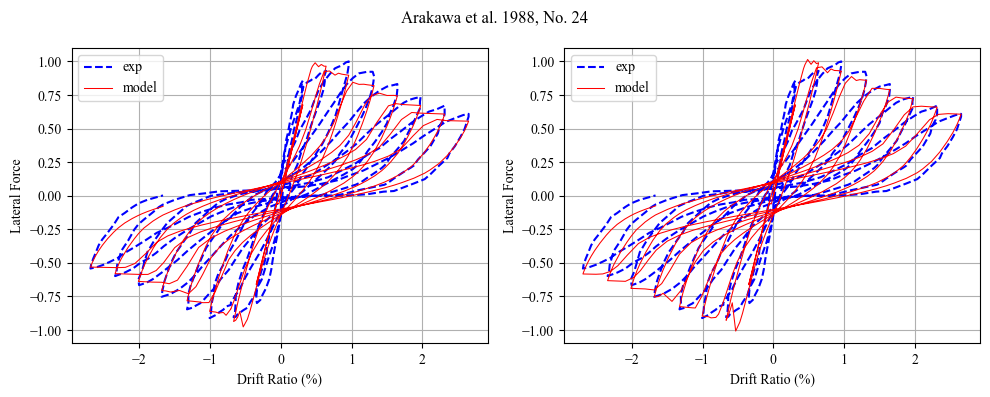



Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.3536496102964852, 1.1678071986389507, 1.0235663872752134, 0.17603812129134686, 0.16566122249520407, 3.068663152639844, 3.5972475296155393, 0.9788399934900903, 2.5542011064625325, 0.005016546645303081, 1.787748242624545, 1.4949313763799226, 0.011862648489080783, 0.6596144671624268]


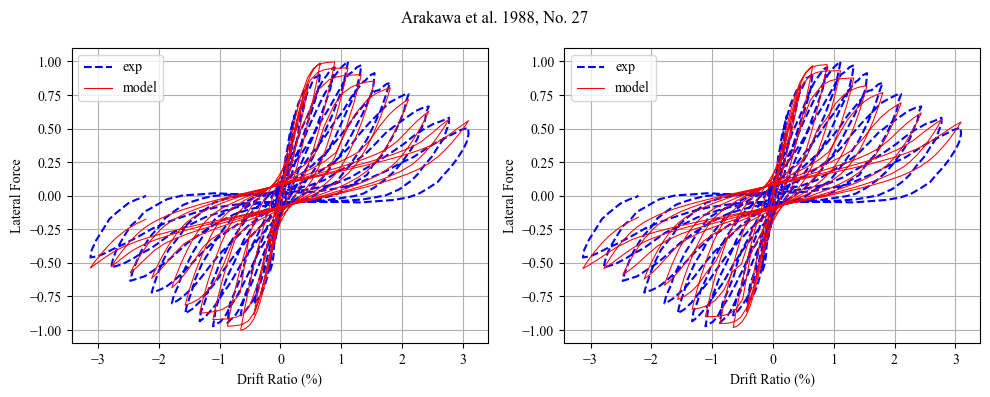



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.43774684994146, 0.7689003467695867, 1.0356098911482785, 0.1129855873359065, 0.09812949291022219, 3.1456623951220535, 3.4891299976832966, 0.565920325749905, 9.011619514625435, 0.0012467721615357485, 0.5705601023565308, 0.4690599613902208, 0.014326333281222526, 1.0317867378925552]


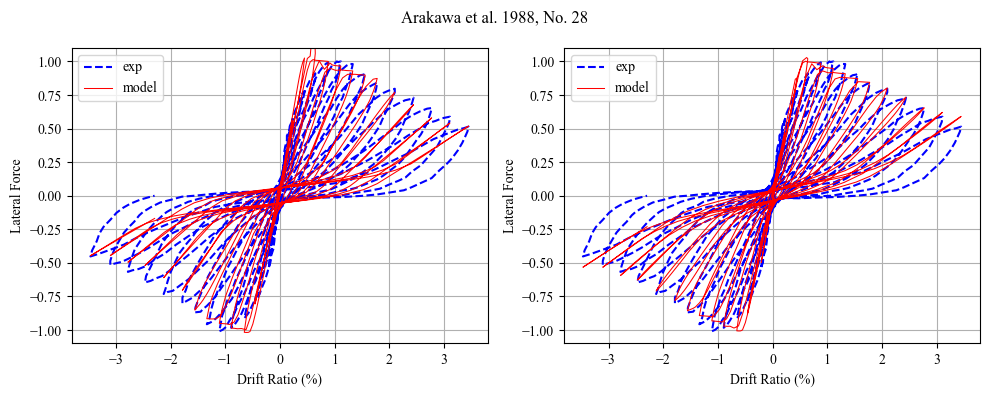



Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.4021544269455057, 0.5346634550904433, 1.027964704168115, 0.31332098937023267, 0.16709013895414546, 1.4542551974029132, 0.740863613578139, 0.757130131219264, 2.4379022023112222, 0.00769150911331707, 7.527950675814807, 1.4305397645062088, 0.004318304188005858, 1.7084778637024378]


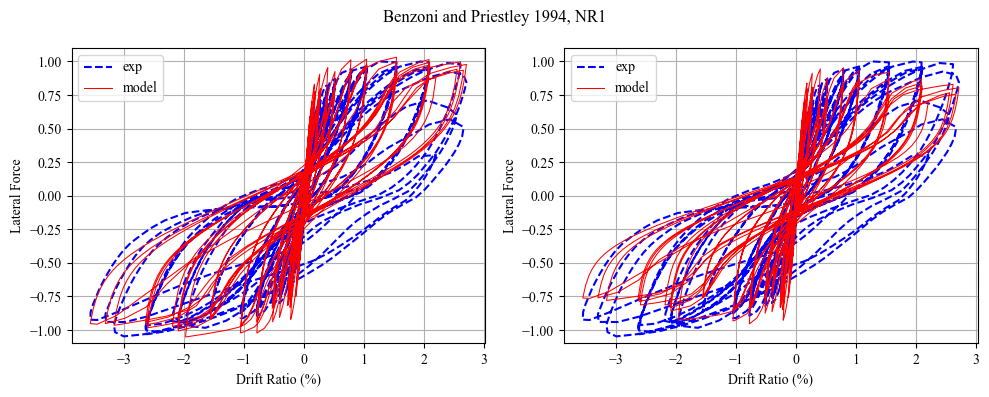



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.0286410453368957, 0.6294101171675469, 0.9955623493459889, 0.5903799451314258, 0.28812100652309647, 0.5878571136003861, 1.8332098578665375, 0.6194700559354394, 2.6974398659376773, 0.002507305821225892, 0.7670181521477262, 0.4878377020251421, 0.009934828255900145, 0.23577070793962482]


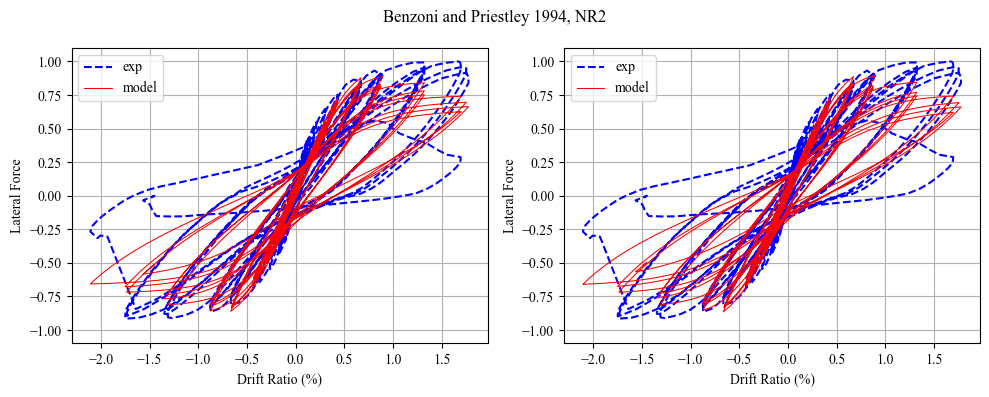



Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.836561410073036, 0.6956701721705165, 1.001345903168745, 0.2421826738096406, 0.40429011276529925, 0.6858312307889964, 0.1405206439861857, 0.961659934856623, 4.498888511442851, 0.019376148426492677, 5.970999628530821, 0.39231063908704233, 0.012726921881851313, 0.2090377003591285]


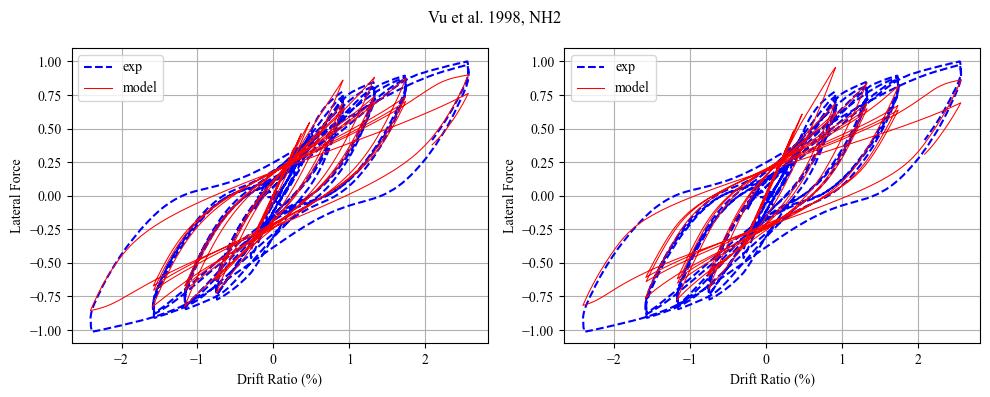



Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[0.8209059769574935, 1.9861658178178545, 1.0154827460509177, 0.3150610616747599, 0.32942915973491643, 2.467482787648145, 1.7470201296110526, 0.7149000548650963, 1.0137885884675244, 0.002544370280164864, 9.877324350829948, 0.2963364033543493, 0.002116195806567635, 0.19034122218937205]


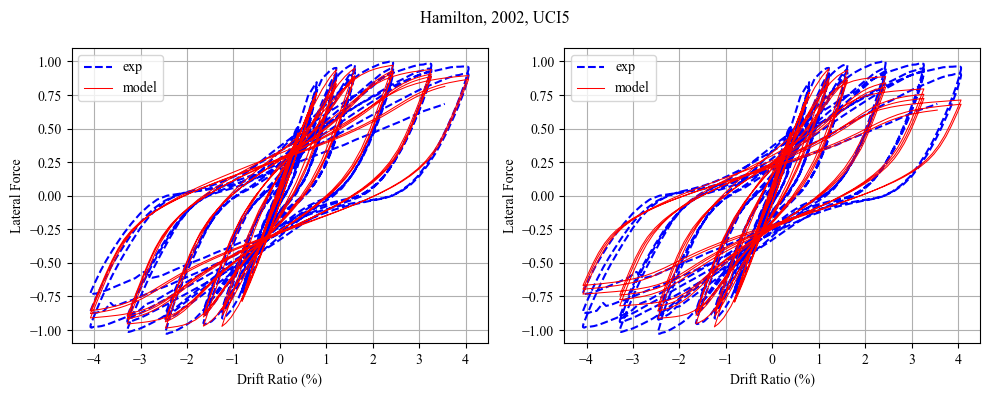



Name not found
C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.1872486111587297, 0.9083254420694001, 0.9820347759413905, 0.3649391330594375, 0.25651000998402557, 0.8318639367632259, 0.31726429576457993, 0.8303200142986765, 1.341785147018085, 0.020668451054053877, 7.216459075995813, 0.5461785336437085, 0.008305543980179821, 0.2780872718090449]


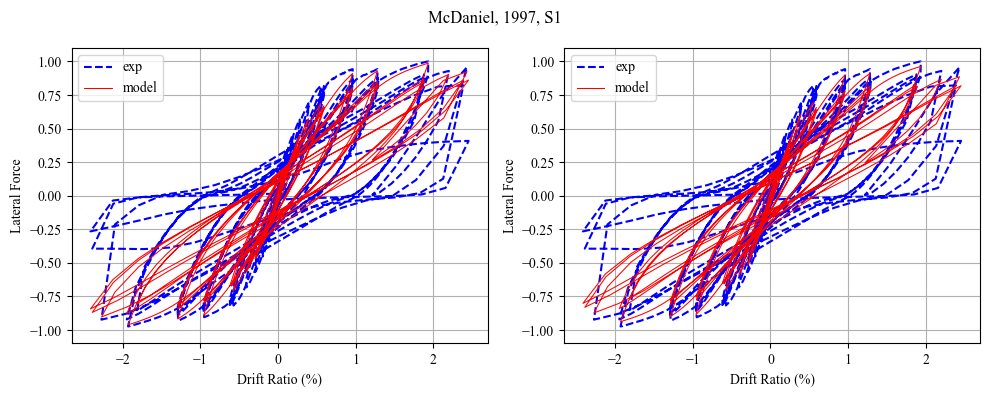



C:\Users\Miguel.MIGUEL-DESK\Documents\GitHub\RC_Column_Model\quoFEM_Surrogate\scInput.json
1
[1.2673372245877241, 2.6781168658167793, 1.0217280883215296, 0.3164323914341616, 0.3255997833656751, 0.6411589204800352, 0.5173916707626816, 0.9932807343616596, 6.5357260944551365, 0.002659546437095239, 9.966055502021831, 0.3616296548420991, 0.019186623084540597, 0.20635816306553761]


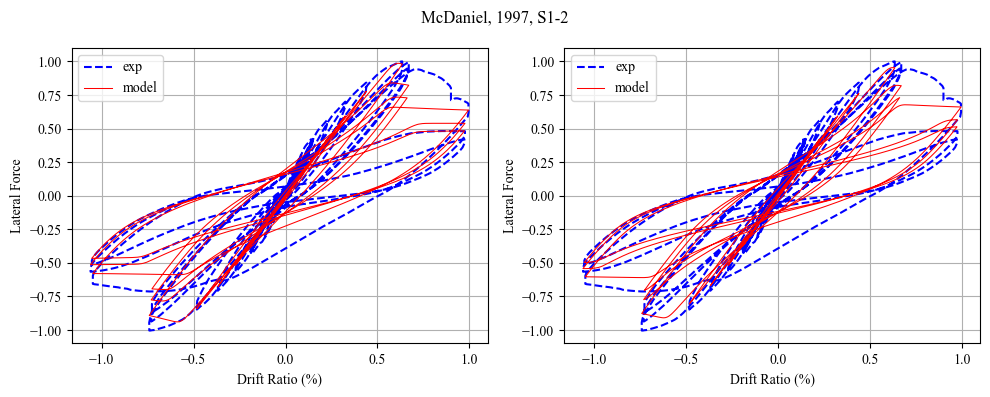



Name not found


In [47]:
# Find where the input data is
cwd = os.getcwd()
allfiles = os.listdir(os.path.join(cwd, 'calibrated_curves_02'))

for file in allfiles[1::]:
    with open(os.path.join(cwd, 'calibrated_curves_02', file), 'r') as f:
        test_data = json.load(f)
    
    disp = test_data['data']['disp']
    force = test_data['data']['force']
    name = test_data['Name']

    try:
        # Find name in the Name column of the merged_data
        index = merged_data[merged_data['name'] == name].index[0]
    except:
        print('Name not found')
        continue

    # Extract the calibrated and nondimensional parameters for both training and testing
    cal_params = merged_data.iloc[index, cal_params_index]
    nondim_params = merged_data.iloc[index, nd_params_index]
    
    params_list = [["RV_column1", nondim_params.iloc[0]],
               ["RV_column2", nondim_params.iloc[1]],
               ["RV_column3", nondim_params.iloc[2]],
               ["RV_column4", nondim_params.iloc[3]],
               ["RV_column5", nondim_params.iloc[4]], 
               ["RV_column6", nondim_params.iloc[5]]
               ]
    
    # Here, call surrogate model
    params = main(params_list, [], surrogate_file, 'dummyout.out', input_json)
    gp_predicted = []
        
    for vals in params[0]:
        gp_predicted.append(vals)
    
    # Run the model
    plt.figure(figsize=(10, 4))
    plt.subplot(1,2,1)
    run_model(cal_params, test_data, show_plots=True)
    plt.ylim([-1.1, 1.1])

    # Now, plot the surrogate predictions
    print(gp_predicted)
    plt.subplot(1,2,2)
    run_model(gp_predicted, test_data, show_plots=True)
    plt.ylim([-1.1, 1.1])
    plt.suptitle(test_data['Name'])
    plt.tight_layout()
    plt.show()
    # cc += 1
    print('\n')
    